# Module 6 - Programming Assignment

## Directions

1. Change the name of this file to be your JHED id as in `jsmith299.ipynb`. Because sure you use your JHED ID (it's made out of your name and not your student id which is just letters and numbers).
2. Make sure the notebook you submit is cleanly and fully executed. I do not grade unexecuted notebooks.
3. Submit your notebook back in Blackboard where you downloaded this file.

*Provide the output **exactly** as requested*

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
from copy import deepcopy
from typing import List, Tuple, Dict, Callable

**For this assignment only**

If you want to use NetworkX with your assignment, you can do:

```
conda install networkx
```
or

```
pip install networkx
```

Additionally, this assignment uses a recursive algorithm. You should use `deecopy` at the appropriate places to avoid entanglement issues.

## CSP: Map Coloring

In this programming assignment, you will be using your new understanding of **Constraint Satisfaction Problems** to color maps. As we know from the [Four Color Theorem](http://en.wikipedia.org/wiki/Four_color_theorem) any division of a plane into contiguous regions can be colored such that no two adjacent regions are the same color by using only four colors.

From the book, we know that we can translate this problem into a CSP where the map is represented as a [planar graph](http://en.wikipedia.org/wiki/Planar_graph) and the goal is to color all the nodes such that no adjacent nodes are colored the same color.

As with most AI problems, this requires us to figure out how best to represent the problem--and the solution--given the high and low level data structures and types at our disposal. For this problem, we'll settle on a Dict which contains at least two keys: "nodes" which is an *ordered* List of Strings that represents each node or vertex in the planar graph and "edges" which contains a List of Tuples that represent edges between nodes. The Tuples are of ints that represent the index of the node in the "nodes" list.

Using this system, and adding a "coordinates" key with abstract drawing coordinates of each node for NetworkX, we can represent the counties of Connecticut like so:

In [3]:
connecticut = { "nodes": ["Fairfield", "Litchfield", "New Haven", "Hartford", "Middlesex", "Tolland", "New London", "Windham"],
                "edges": [(0,1), (0,2), (1,2), (1,3), (2,3), (2,4), (3,4), (3,5), (3,6), (4,6), (5,6), (5,7), (6,7)],
                "coordinates": [( 46, 52), ( 65,142), (104, 77), (123,142), (147, 85), (162,140), (197, 94), (217,146)]}
print(connecticut)

{'nodes': ['Fairfield', 'Litchfield', 'New Haven', 'Hartford', 'Middlesex', 'Tolland', 'New London', 'Windham'], 'edges': [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6), (5, 7), (6, 7)], 'coordinates': [(46, 52), (65, 142), (104, 77), (123, 142), (147, 85), (162, 140), (197, 94), (217, 146)]}


The coordinates permit us to use NetworkX to draw the graph. We'll add a helper function for this, `draw_map`, which takes our planar_map, a figure size in abstract units, and a List of color assignments in the same order as the nodes in the planar_map.  The underlying drawings are made by matplotlib using NetworkX on top of it. Incidentally, the positions just make the map "work out" on NetworkX/matplotlib.

The size parameter is actually inches wide by inches tall (8, 10) is an 8x10 sheet of paper. Why doesn't a chart cover up the whole screen then? It's adjusted by dpi. On high resolution monitors, 300 dpi with 8x10 inches might only take up a fraction of that space. Use whatever you want to make the output look good. It doesn't matter for anything else but that.

A default value for `color_assignments` is provided, `None`, that simply colors all the nodes red. Otherwise, `color_assignments` must be a `List of Tuples` where each `Tuple` is a node name and assigned color. The order of `color_assignments` must be the same as the order of `"nodes"` in the `planar_map`.

**If you are using NetworkX in your assignment, you can copy this function into module03.py**

In [4]:
def draw_map(name, planar_map, size, color_assignments=None):
    def as_dictionary(a_list):
        dct = {}
        for i, e in enumerate(a_list):
            dct[i] = e
        return dct
    
    G = nx.Graph()
    
    labels = as_dictionary(planar_map["nodes"])
    pos = as_dictionary(planar_map["coordinates"])
    
    # create a List of Nodes as indices to match the "edges" entry.
    nodes = [n for n in range(0, len(planar_map["nodes"]))]

    if color_assignments:
        colors = [c for n, c in color_assignments]
    else:
        colors = ['red' for c in range(0,len(planar_map[ "nodes"]))]

    G.add_nodes_from(nodes)
    G.add_edges_from(planar_map[ "edges"])

    plt.figure(figsize=size, dpi=100)
    plt.title(name)
    nx.draw(G, node_color = colors, with_labels = True, labels = labels, pos = pos)
    
#    plt.savefig(name + ".png")

Using this function, we can draw `connecticut`:

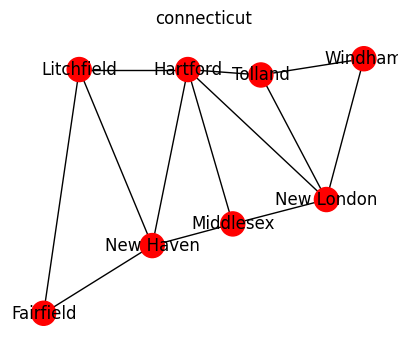

In [5]:
draw_map("connecticut", connecticut, (5,4), [(n, "red") for n in connecticut["nodes"]])

This coloring obviously has some problems! You're going to write a program to fix it.

So what we (and by "we", I mean "you") would like to do is write a program that can figure out how to color a planar map...ie, `connecticut` *and* `europe`, you will do it by implementing a function that uses the algorithms that were discussed in this module.

## Which CSP Algorithms?

You will need to implement **backtracking** and **forward checking**. You can roll your own from Depth First Search or use the pseudocode for `backtracking_search` on p. 192 of AIAMA 4th Edition.

You will also need to implement one of the following heuristics: **Minimum Remaining Values** or **Degree Heuristic** (tell me which one; it doesn't make sense to implement both) as well as **Least Constraining Value**. Break ties in ascending order (least to most).

You should get the backtracking and forward checking implemented first. Then add the heuristics. You can use the pseudocode in the book and then stub out the functions that implement the "pick a variable" heuristic and the "pick a value" heuristic. When you get it working, fill in the appropriate heuristic mentioned above.

Please change the "?" below into "yes" or "no" indicating which elements you were able to implement:

    backtracking: yes
    forward checking: yes
    minimum remaining values: yes
    degree heuristic: no
    least contraining value: yes

Your function should take the following form:

```python
def color_map( planar_map, color_list, trace=False)
```

where `planar_map` has the format described above, colors is a List of Strings denoting the colors to use and `trace` operates as described in the next paragraph. It should return a List of Tuples where each Tuple is of the form `( Node Name, Color)` in the same order as the `node` entry in the planar_map. For example, if we had `["A", "B"]` as nodes and `["Yellow", "Green"]` as colors, your function might return `[("A", "Yellow"), ("B", "Green")]`. If a coloring cannot be found, return `None`.

Your function also will take an optional argument, `trace`, with a default value of `False`. 

If `trace` is set to `True` your program will print out *traces* (or debugging) statements that show what it is currently doing (in terms of the algorithms you are supposed to implement). For example, if your program starts to backtrack, the trace should say that it has to backtrack and why.

As usual, you should implement your function using helper functions, using one Markdown cell for documentation and one Codecell for implementation (one function and assertions).

-----

<a id="get_constraints"></a>
## get_constraints

- Returns a dictionary of constraints. 
- Each node is the dictionary key. The value is a list of nodes that the node has a constraint with

* **nodes** List[string]: list of node names
* **edges** List[Tuple(int,int)]: edges of constraints


**returns** dict: constraints for each node

In [6]:
def get_constraints(nodes:List[str], edges:List[Tuple])->dict:
    constraints = {}
    for n in range(len(nodes)):
        # with index at position 0 of edges
        constraints[nodes[n]] = [ nodes[indexes[1]] for indexes in edges if indexes[0] == n]

        # with index at position 1 of edges
        constraints[nodes[n]] = constraints[nodes[n]] + [ nodes[indexes[0]] for indexes in edges if indexes[1] == n]

    return constraints

In [7]:
con = get_constraints(connecticut["nodes"], connecticut["edges"])

#verify the number of constraints matches number of nodes
assert len(con) == len(connecticut["nodes"])

# verify it returns dictionary with all nodes as keys
for k in con.keys():
    assert k in connecticut["nodes"]

# verify the lengths are correct for each node
len_check = {'Fairfield': 2,'Litchfield': 3,'New Haven': 4,'Hartford': 5,'Middlesex': 3,'Tolland': 3,
 'New London': 4,'Windham': 2}
for node in con:
    assert len(con[node]) == len_check[node]

# verify constraints are node names not indexes
for node in con:
    for item in node:
        assert(isinstance(item, str))

<a id="get_avail_domains"></a>
## get_avail_domains

- Returns a dictionary nodes with the values each node can take (the domain)
- Key is the node name and list is the available domain, values, the node can take

* **nodes** List[str]: list of nodes/variables
* **domains** List[str]: values a node can take


**returns** dict: nodes mapped to available values/domains

In [8]:
def get_avail_domains(nodes:List[str], domains:List[str])->dict:
    available = {}

    for n in nodes:
        available[n] = domains
    return available

In [9]:
c_list = ["red", "blue", "green", "yellow"]

av_domains = get_avail_domains(connecticut["nodes"], c_list)

#verify all nodes in av_domains
assert len(av_domains) == len(connecticut["nodes"])

# verify all keys are in av domain
for node in connecticut["nodes"]:
    assert node in av_domains.keys()

# verify all colors in av_domains
for av in av_domains:
    assert av_domains[av] == c_list

<a id="min_remaining_node"></a>
## min_remaining_node

- Implements minimum remaining value heuristic 
- A node is chosen when it has the smallest domain

* **nodes** List[str]: list of node names
* **domains** dict: available domain per node. 


**returns** str: node name with smallest domain

In [10]:
def min_remaining_node(nodes:List[str], domains:dict)->str:
    min_domain_node = 0
    min_domain_size = len(domains[nodes[0]])

    for n in nodes:
        if len(domains[n]) < min_domain_size:
            min_domain_size = len(domains[n])
            min_domain_node = nodes.index(n)
    return min_domain_node

In [11]:
# unit test
test_domains = {'Fairfield': ['red', 'blue', 'green', 'yellow'],
 'Litchfield': ['red', 'yellow'],
 'New Haven': ['red', 'blue', 'green']}
nodes_min_test = ['Fairfield','Litchfield','New Haven' ]
min_node_found = min_remaining_node(nodes_min_test, test_domains)

# verify returns an index not a node name
assert isinstance(min_node_found,int)

# verify returns the right node
assert min_node_found == 1

# verify returns first node if all nodes have the same number of domains
test_domains_2 = {'Fairfield': ['red', 'blue'],
 'Litchfield': ['red', 'yellow'],
 'New Haven': ['red', 'green']}
min_node_found2 = min_remaining_node(nodes_min_test, test_domains_2)
assert min_node_found2 == 0

<a id="least_constraining_value"></a>
## least_constraining_value

- Implements the least constraining value heuristic
- A value is chosen for a given node is the value has the fewest constraints to other nodes
- This function returns a list of values in order from least constrianing to most constraining 

* **node** str: node name where value will be selected from
* **constraint** List[str]: list of constraints for the node
* **domains** dict: available domain per node. 


**returns** List[str]: values in order of constraining capability (least to most)

In [12]:
def least_constraining_value(node:str,constraint:List[str], domains:dict)->List[str]:
    count_constraints = []
    values_copy = deepcopy(domains[node])

    for value in domains[node]:
        con_count = 0
        for con in constraint:
            if value in domains[con]:
                con_count += 1
        count_constraints.append(con_count)
    # order the list from least to most
    final_list =[]
    while len(final_list) < len(domains[node]):
        least_con_index = count_constraints.index(min(count_constraints))
        final_list.append(values_copy[least_con_index])
        values_copy.pop(least_con_index)
        count_constraints.pop(least_con_index)

    return final_list

In [13]:
small_test_domains = {'Middlesex': ['red', 'green', 'yellow'],
 'Tolland': ['red',  'green', ],
 'New London': ['red', 'blue','green', 'yellow'],
 'Windham': ['red',  'green', ],
 'Hartford': ['red', 'blue' , 'yellow']}

v_test = least_constraining_value('New London', con['New London'], small_test_domains)


#verify a list of valid values is returned
for v in v_test:
    assert v in small_test_domains['New London']

# assert value is correct
assert v_test == ["blue", "yellow","green", "red"]

# if all constraints exists then the same order of values is returned
v_test2 = least_constraining_value('New London', con['New London'], av_domains)
assert v_test2 ==  ['red', 'blue' , 'green','yellow']

<a id="consistent"></a>
## consistent

- Verifies if a value is consistent. This means no constraint is broken
- Returns true is consistent or false is rule is broken

* **value** str: value node will take
* **constraints**  List[str]: list of constraints for the node
* **assigned** dict: list of nodes that already have a value assigned to it

**returns** bool: is consistent or not


In [14]:
def consistent(value:str, constraint:List[str], assigned:dict)->bool:
    for con in constraint: # loops through constraints
        if con in assigned: # if constraint if assigned already
            #check will the this value violate the constraint
            if assigned[con] == value:
                return False
    return True

In [15]:
value_test = "blue"
constraint_test = ['New Haven', 'Hartford', 'Fairfield']
assigned_test= {"New Haven": "red", "Queens": "blue"}

# verify returns true if assigned is empty
empty= consistent(value_test, constraint_test,{})
assert empty == True

# verify returns true if no rule is broken
true_test = consistent(value_test, constraint_test, assigned_test)
assert true_test == True

# verify returns false if a rule is broken
assigned_test["Hartford"] ="blue"
false_test = consistent(value_test, constraint_test, assigned_test)
assert false_test == False

<a id="forward_check"></a>
## forward_check

- Implements forward checking
- This reduces the domains of all other nodes with a constraint on the node that is currently being assigned
- This removes the value from all the other domains

* **value** str: value node will take
* **domains** dict: available domain per node.
* **constraint** List[str]: list of constraints for the node
* **node** str: node name that is getting assigned
* **trace** bool: prints out progress in function. Used for debugging 


**returns** dict: returns a dict of available domains for each node

In [16]:
def forward_check(value:str, domains:dict, constraints:List[str], node:str,trace= False)->dict:
    domains_copy = deepcopy(domains)
    if trace:
        print("Forward checking after assigning", value,"to", node )
    # for each node with a constraint
    for con in constraints:
        # remove the one value from the available domain list
        del domains_copy[con]
        domains_copy[con] = [v for v in domains[con] if v != value]
        if trace:
            print("Update to",con, "with", domains_copy[con])
            print("Previously was", domains[con])
    return domains_copy

In [17]:
domains_test = deepcopy(av_domains)
Tolland_con = ['New London', 'Windham', 'Hartford']

new_domains = forward_check("red", domains_test,Tolland_con,"Tolland",False)
# verify domains_test didnt change
assert new_domains != domains_test

# verify the constraints are one size smaller for the Tolland cons
for c in Tolland_con:
    assert len(new_domains[c]) == 3

# verify no change if value not in domain
new_domains2 = forward_check("pink", domains_test, Tolland_con,"Tolland")
assert new_domains2 == domains_test


<a id="back_check"></a>
## back_check

- Implements back checking
- Assigned each value to a node using recursion

* **assigments** dict: dict of nodes that have been assigned a value
* **nodes** List[str]: nodes available in game
* **constraint** dict: dict containing list of constraints for each node
* **domains** dict: available domain per node. 
* **trace** bool: prints out progress in function. Used for debugging 


**returns** dict: returns dict with assignment of value for each node

In [18]:
def back_check(assignments:dict, nodes:List[str], constraints:dict, domains:dict, trace=False)->dict:
    if len(assignments) == len(nodes):
        return assignments
    else:
        # get unassigned nodes
        unassigned = [n for n in nodes if n not in assignments]
        var = unassigned[min_remaining_node(unassigned, domains)] # variable heuristic
        for value in least_constraining_value(var, constraints[var], domains): # value heuristic
            if consistent(value, constraints[var], assignments):
                copy_assignment = assignments.copy()
                copy_assignment[var] = value
                forward_check_doms = forward_check(value, domains, constraints[var], var,trace)
                result = back_check(copy_assignment, nodes, constraints, forward_check_doms,trace) 
                if result is not None:
                    if trace:
                        print("Assigning Value", value, "to", var)
                    return result
        if trace:
            print("Back tracking", var)
        return None

In [19]:
nodes_test = connecticut["nodes"][:4]

b = back_check({}, nodes_test, con, av_domains)

# verify all nodes are assigned a value
for n in nodes_test:
    assert n in b.keys()

# verify each assigment is valid. Doesn't break constraints
for assign in b:
    assert consistent(b[assign], con[assign], b) == True

# verify nothing is returned is problem is unsolvable
av_domains_one_color = get_avail_domains(connecticut["nodes"], ["red"]) # only one color option
b2 = back_check({}, nodes_test, con, av_domains_one_color)
assert b2 == None

<a id="back_checking_search"></a>
## back_checking_search

- Implements back checking algorithm by calling a recursive back checking function
- Returns assigned value to each node 
- Returns node when problem can't be solved

* **nodes** List[str]: list of node names
* **constraint** dict: dict containing a list of constraints for each node
* **domains** dict: available domain per node. 
* **trace** bool: prints out progress in function. Used for debugging 


**returns** List[Tuple]: List of (node, value assigned) or None

In [20]:
def back_checking_search(nodes:List[str], constraints:dict, domains:dict, trace=False)->list[Tuple]:
    back_dict = back_check({}, nodes, constraints, domains, trace)
    if back_dict == None:
        return []
    return [(node, back_dict[node]) for node in back_dict] # return in tuple format

In [21]:
back = back_checking_search(connecticut["nodes"], con, av_domains)

#verify returns the right type, list of tuple
assert isinstance(back, list)
assert isinstance(back[0], tuple)

# verify length matches number of nodes
assert len(back) == len(connecticut["nodes"])

# verify empty list return when problem is unsolvable
back2 = back_checking_search( nodes_test, con, av_domains_one_color) # single color option
assert back2 == []

<a id="color_map"></a>
## solve_game

- Implements back checking with forward checking CSP algorithm to color a map with constriants
- returns the list of assignment in the order of the map


* **planar_map** dict: dict of nodes, edges and coordinates
* **color_list** List[str]: list of domains for all nodes. These are the values a node could take
* **trace** bool: prints out progress in function. Used for debugging 


**returns** List[Tuple]: returns list of tuples (node, value assigned) or None

In [22]:
def color_map(planar_map:dict, color_list:List[str], trace=False)->List[Tuple]:
    # pre-processing
    domains = get_avail_domains( planar_map["nodes"], color_list)
    constraints = get_constraints(planar_map["nodes"], planar_map["edges"])
    # CSP algo
    colors = back_checking_search(planar_map["nodes"], constraints, domains, trace)
    # sort the nodes
    colors_sorted = [c for n in planar_map["nodes"] for c in colors if c[0]== n]

    return colors_sorted

In [23]:
color_test = color_map(connecticut, ["red", "blue", "green", "yellow"], trace=False)

#verify returns the right type, list of tuple
assert isinstance(color_test, list)
assert isinstance(color_test[0], tuple)

# verify length matches number of nodes
assert len(color_test) == len(connecticut["nodes"])

# verify empty list return when problem is unsolvable
color_test2 = color_map(connecticut, [ "yellow"], trace=False)
assert color_test2 == []

## Problem 1. Color Connecticut Using Your Solution

In [24]:
connecticut_colors = color_map(connecticut, ["red", "blue", "green", "yellow"], trace=True)

Forward checking after assigning red to Fairfield
Update to Litchfield with ['blue', 'green', 'yellow']
Previously was ['red', 'blue', 'green', 'yellow']
Update to New Haven with ['blue', 'green', 'yellow']
Previously was ['red', 'blue', 'green', 'yellow']
Forward checking after assigning blue to Litchfield
Update to New Haven with ['green', 'yellow']
Previously was ['blue', 'green', 'yellow']
Update to Hartford with ['red', 'green', 'yellow']
Previously was ['red', 'blue', 'green', 'yellow']
Update to Fairfield with ['red', 'green', 'yellow']
Previously was ['red', 'blue', 'green', 'yellow']
Forward checking after assigning green to New Haven
Update to Hartford with ['red', 'yellow']
Previously was ['red', 'green', 'yellow']
Update to Middlesex with ['red', 'blue', 'yellow']
Previously was ['red', 'blue', 'green', 'yellow']
Update to Fairfield with ['red', 'yellow']
Previously was ['red', 'green', 'yellow']
Update to Litchfield with ['blue', 'yellow']
Previously was ['blue', 'green', 

In [25]:
connecticut_colors

[('Fairfield', 'red'),
 ('Litchfield', 'blue'),
 ('New Haven', 'green'),
 ('Hartford', 'red'),
 ('Middlesex', 'blue'),
 ('Tolland', 'blue'),
 ('New London', 'green'),
 ('Windham', 'red')]

Using the "edges" list from the connecticut map, we can test to see if each pair of adjacent nodes is indeed colored differently:

In [26]:
edges = connecticut["edges"]
nodes = connecticut[ "nodes"]
colors = connecticut_colors
COLOR = 1

for start, end in edges:
    try:
        assert colors[start][COLOR] != colors[end][COLOR]
    except AssertionError:
        print(f"{nodes[start]} and {nodes[end]} are adjacent but have the same color.")

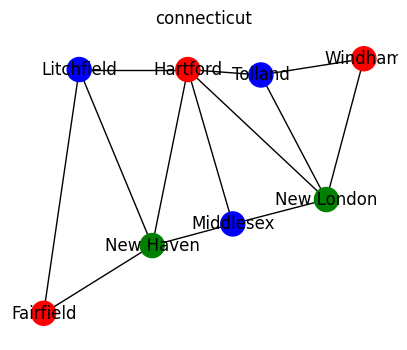

In [27]:
draw_map("connecticut", connecticut, (5,4), connecticut_colors)

Forward checking after assigning red to Fairfield
Update to Litchfield with ['blue', 'green']
Previously was ['red', 'blue', 'green']
Update to New Haven with ['blue', 'green']
Previously was ['red', 'blue', 'green']
Forward checking after assigning blue to Litchfield
Update to New Haven with ['green']
Previously was ['blue', 'green']
Update to Hartford with ['red', 'green']
Previously was ['red', 'blue', 'green']
Update to Fairfield with ['red', 'green']
Previously was ['red', 'blue', 'green']
Forward checking after assigning green to New Haven
Update to Hartford with ['red']
Previously was ['red', 'green']
Update to Middlesex with ['red', 'blue']
Previously was ['red', 'blue', 'green']
Update to Fairfield with ['red']
Previously was ['red', 'green']
Update to Litchfield with ['blue']
Previously was ['blue', 'green']
Forward checking after assigning red to Hartford
Update to Middlesex with ['blue']
Previously was ['red', 'blue']
Update to Tolland with ['blue', 'green']
Previously was 

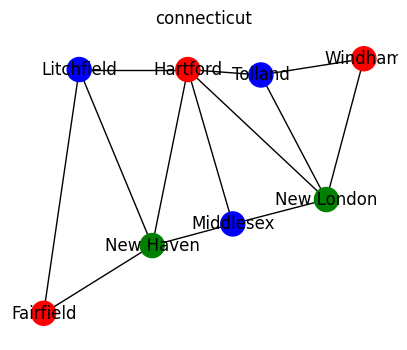

In [28]:
connecticut_colors = color_map( connecticut, ["red", "blue", "green"], trace=True)
if connecticut_colors:
    draw_map("connecticut", connecticut, (5,4), connecticut_colors)

## Problem 2. Color Europe Using Your solution

In [29]:
europe = {
    "nodes":  ["Iceland", "Ireland", "United Kingdom", "Portugal", "Spain",
                 "France", "Belgium", "Netherlands", "Luxembourg", "Germany",
                 "Denmark", "Norway", "Sweden", "Finland", "Estonia",
                 "Latvia", "Lithuania", "Poland", "Czech Republic", "Austria",
                 "Liechtenstein", "Switzerland", "Italy", "Malta", "Greece",
                 "Albania", "Macedonia", "Kosovo", "Montenegro", "Bosnia Herzegovina",
                 "Serbia", "Croatia", "Slovenia", "Hungary", "Slovakia",
                 "Belarus", "Ukraine", "Moldova", "Romania", "Bulgaria",
                 "Cyprus", "Turkey", "Georgia", "Armenia", "Azerbaijan",
                 "Russia" ], 
    "edges": [(0,1), (0,2), (1,2), (2,5), (2,6), (2,7), (2,11), (3,4),
                 (4,5), (4,22), (5,6), (5,8), (5,9), (5,21), (5,22),(6,7),
                 (6,8), (6,9), (7,9), (8,9), (9,10), (9,12), (9,17), (9,18),
                 (9,19), (9,21), (10,11), (10,12), (10,17), (11,12), (11,13), (11,45), 
                 (12,13), (12,14), (12,15), (12,17), (13,14), (13,45), (14,15),
                 (14,45), (15,16), (15,35), (15,45), (16,17), (16,35), (17,18),
                 (17,34), (17,35), (17,36), (18,19), (18,34), (19,20), (19,21), 
                 (19,22), (19,32), (19,33), (19,34), (20,21), (21,22), (22,23),
                 (22,24), (22,25), (22,28), (22,29), (22,31), (22,32), (24,25),
                 (24,26), (24,39), (24,40), (24,41), (25,26), (25,27), (25,28),
                 (26,27), (26,30), (26,39), (27,28), (27,30), (28,29), (28,30),
                 (29,30), (29,31), (30,31), (30,33), (30,38), (30,39), (31,32),
                 (31,33), (32,33), (33,34), (33,36), (33,38), (34,36), (35,36),
                 (35,45), (36,37), (36,38), (36,45), (37,38), (38,39), (39,41),
                 (40,41), (41,42), (41,43), (41,44), (42,43), (42,44), (42,45),
                 (43,44), (44,45)],
    "coordinates": [( 18,147), ( 48, 83), ( 64, 90), ( 47, 28), ( 63, 34),
                   ( 78, 55), ( 82, 74), ( 84, 80), ( 82, 69), (100, 78),
                   ( 94, 97), (110,162), (116,144), (143,149), (140,111),
                   (137,102), (136, 95), (122, 78), (110, 67), (112, 60),
                   ( 98, 59), ( 93, 55), (102, 35), (108, 14), (130, 22),
                   (125, 32), (128, 37), (127, 40), (122, 42), (118, 47),
                   (127, 48), (116, 53), (111, 54), (122, 57), (124, 65),
                   (146, 87), (158, 65), (148, 57), (138, 54), (137, 41),
                   (160, 13), (168, 29), (189, 39), (194, 32), (202, 33),
                   (191,118)]}
print(europe)

{'nodes': ['Iceland', 'Ireland', 'United Kingdom', 'Portugal', 'Spain', 'France', 'Belgium', 'Netherlands', 'Luxembourg', 'Germany', 'Denmark', 'Norway', 'Sweden', 'Finland', 'Estonia', 'Latvia', 'Lithuania', 'Poland', 'Czech Republic', 'Austria', 'Liechtenstein', 'Switzerland', 'Italy', 'Malta', 'Greece', 'Albania', 'Macedonia', 'Kosovo', 'Montenegro', 'Bosnia Herzegovina', 'Serbia', 'Croatia', 'Slovenia', 'Hungary', 'Slovakia', 'Belarus', 'Ukraine', 'Moldova', 'Romania', 'Bulgaria', 'Cyprus', 'Turkey', 'Georgia', 'Armenia', 'Azerbaijan', 'Russia'], 'edges': [(0, 1), (0, 2), (1, 2), (2, 5), (2, 6), (2, 7), (2, 11), (3, 4), (4, 5), (4, 22), (5, 6), (5, 8), (5, 9), (5, 21), (5, 22), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9), (9, 10), (9, 12), (9, 17), (9, 18), (9, 19), (9, 21), (10, 11), (10, 12), (10, 17), (11, 12), (11, 13), (11, 45), (12, 13), (12, 14), (12, 15), (12, 17), (13, 14), (13, 45), (14, 15), (14, 45), (15, 16), (15, 35), (15, 45), (16, 17), (16, 35), (17, 18), (17, 34), (17, 

In [30]:
europe_colors = color_map(europe, ["red", "blue", "green", "yellow"], trace=True)

Forward checking after assigning red to Iceland
Update to Ireland with ['blue', 'green', 'yellow']
Previously was ['red', 'blue', 'green', 'yellow']
Update to United Kingdom with ['blue', 'green', 'yellow']
Previously was ['red', 'blue', 'green', 'yellow']
Forward checking after assigning blue to Ireland
Update to United Kingdom with ['green', 'yellow']
Previously was ['blue', 'green', 'yellow']
Update to Iceland with ['red', 'green', 'yellow']
Previously was ['red', 'blue', 'green', 'yellow']
Forward checking after assigning green to United Kingdom
Update to France with ['red', 'blue', 'yellow']
Previously was ['red', 'blue', 'green', 'yellow']
Update to Belgium with ['red', 'blue', 'yellow']
Previously was ['red', 'blue', 'green', 'yellow']
Update to Netherlands with ['red', 'blue', 'yellow']
Previously was ['red', 'blue', 'green', 'yellow']
Update to Norway with ['red', 'blue', 'yellow']
Previously was ['red', 'blue', 'green', 'yellow']
Update to Iceland with ['red', 'yellow']
Previ

Here we're testing to see if the adjacent nodes are colored differently:

In [31]:
edges = europe["edges"]
nodes = europe[ "nodes"]
colors = europe_colors
COLOR = 1

for start, end in edges:
    try:
        assert colors[start][COLOR] != colors[end][COLOR]
    except AssertionError:
        print(f"{nodes[start]} and {nodes[end]} are adjacent but have the same color.")

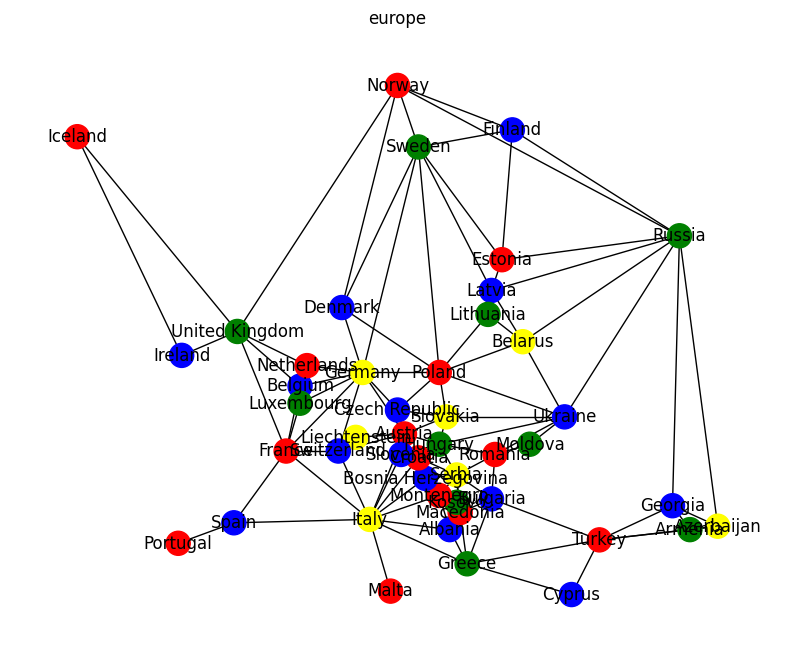

In [32]:
draw_map("europe", europe, (10,8), europe_colors)

In [33]:
europe_colors = color_map(europe, ["red", "blue", "green"], trace=True)
if europe_colors:
     draw_map("europe", europe, (10,8), europe_colors)

Forward checking after assigning red to Iceland
Update to Ireland with ['blue', 'green']
Previously was ['red', 'blue', 'green']
Update to United Kingdom with ['blue', 'green']
Previously was ['red', 'blue', 'green']
Forward checking after assigning blue to Ireland
Update to United Kingdom with ['green']
Previously was ['blue', 'green']
Update to Iceland with ['red', 'green']
Previously was ['red', 'blue', 'green']
Forward checking after assigning green to United Kingdom
Update to France with ['red', 'blue']
Previously was ['red', 'blue', 'green']
Update to Belgium with ['red', 'blue']
Previously was ['red', 'blue', 'green']
Update to Netherlands with ['red', 'blue']
Previously was ['red', 'blue', 'green']
Update to Norway with ['red', 'blue']
Previously was ['red', 'blue', 'green']
Update to Iceland with ['red']
Previously was ['red', 'green']
Update to Ireland with ['blue']
Previously was ['blue', 'green']
Forward checking after assigning red to France
Update to Belgium with ['blue']

## Before You Submit...

1. Did you provide output exactly as requested?
2. Did you re-execute the entire notebook? ("Restart Kernel and Rull All Cells...")
3. If you did not complete the assignment or had difficulty please explain what gave you the most difficulty in the Markdown cell below.
4. Did you change the name of the file to `jhed_id.ipynb`?

Do not submit any other files.